```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
!pip install diffusers transformers safetensors accelerate

In [ ]:
import torch
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt

# Diagram

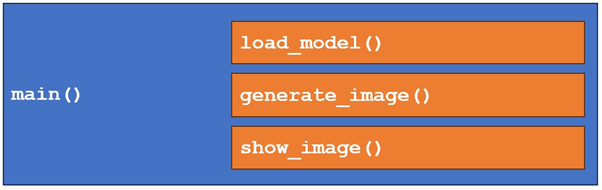

# Code

In [ ]:
def load_model(base_model_id, weights_path=None, weight_name=None):
    pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
    if weights_path and weight_name:
        pipeline.load_lora_weights(weights_path, weight_name=weight_name)
    return pipeline

In [ ]:
def generate_image(pipeline, prompt):
    result = pipeline(prompt)
    return result.images[0]

In [ ]:
def show_image(image):
    plt.axis('off')
    plt.imshow(image)
    plt.show()

In [ ]:
def main():
    base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
    weights_path = "Norod78/SDXL-Caricaturized-Lora"
    weight_name = "SDXL-Caricaturized-Lora.safetensors"
    prompt = "Klaus Meine caricaturized very detailed, clean, high quality, sharp image."

    pipeline = load_model(base_model_id, weights_path, weight_name)
    image = generate_image(pipeline, prompt)
    show_image(image)

# Execution

In [ ]:
main()